## Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
import warnings

warnings.filterwarnings("ignore")

## Carregando o conjunto de dados

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv")
df.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


Ao analisar a tabela, podemos notar que temos um conjunto de dados de série temporal.

## Visualização gráfica

<Axes: xlabel='tempo', ylabel='passageiros'>

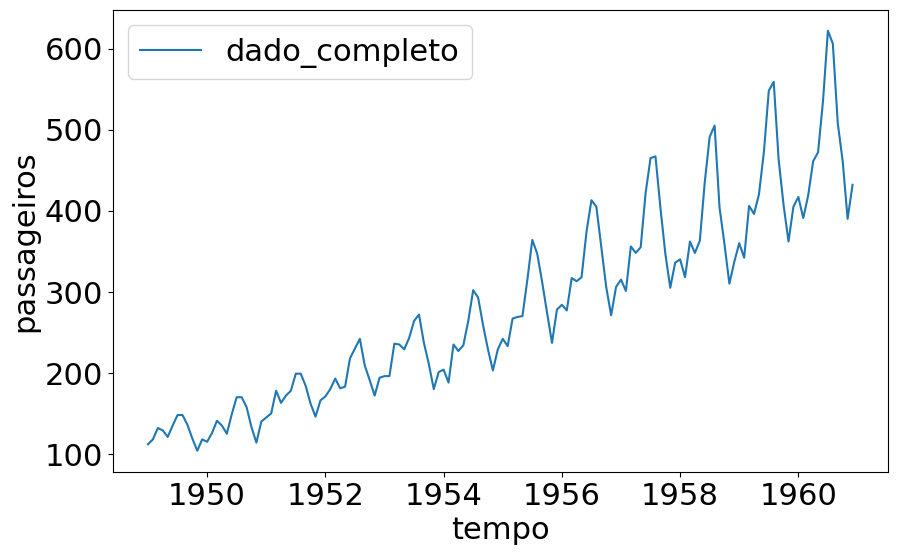

In [3]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22
sns.lineplot(x="tempo", y="passageiros", data=df, label='dado_completo')

Ao analisar o gráfico, é interessante perceber que ao longo dos anos há um aumento no número de passageiros. Além disso, cada ano apresenta seus próprios momentos de pico, variando de acordo com o mês. Essas flutuações sazonais podem revelar padrões interessantes sobre o comportamento dos passageiros ao longo do tempo.

## Criação do modelo

### Escalando os dados

In [4]:
# Instanciando o scaler.
sc = StandardScaler()
sc.fit(df)

# Transformando os dados.
df_sc = sc.transform(df)

### Dividindo os dados de entrada e saída

Text(0, 0.5, 'Passageiros')

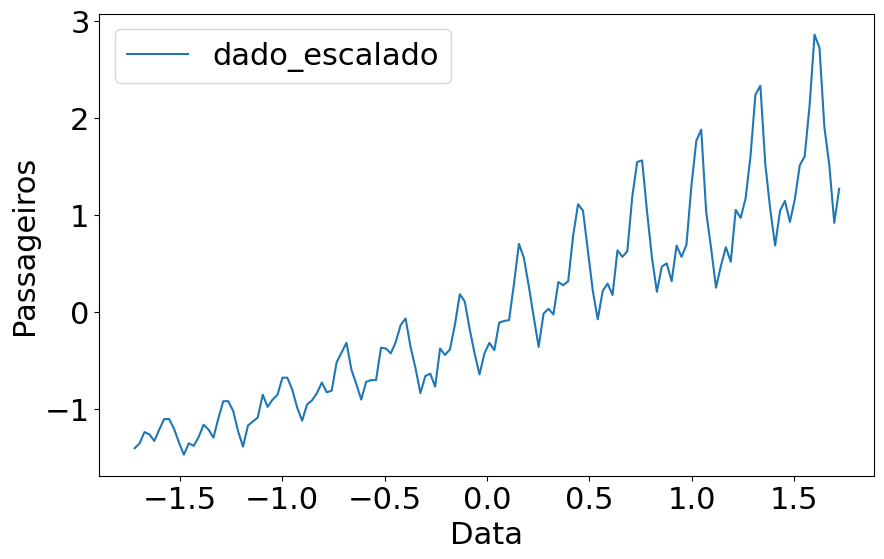

In [5]:
X = df_sc[:,0]
y = df_sc[:,1]

# Gerando o gráfico (mesmo gráfico acima, porém com os dados transformados).
sns.lineplot(x=X, y=y, label='dado_escalado')
plt.xlabel('Data')
plt.ylabel('Passageiros')

### Separando os dados de treino e teste

In [ ]:
# Dividindo os dados em treino e teste.
tamanho_treino = int(len(df)*0.9) # 90% dos dados para treino.
tamanho_teste = len(df) - tamanho_treino # 10% dos dados para teste.

# Dividindo os dados de treino e teste.
X_treino = X[0:tamanho_treino]
y_treino = y[0:tamanho_treino]
X_teste = X[tamanho_treino:len(df)]
y_teste = y[tamanho_treino:len(df)]

# Gerando o gráfico com os dados de treino e teste.	
sns.lineplot(x=X_treino, y=y_treino, label='treino')
sns.lineplot(x=X_teste, y=y_teste, label='teste')
plt.xlabel('Data')
plt.ylabel('Passageiros')

### Criando a rede neural 1

Na primeira rede neural, geramos uma camada com ativação linear para analisar como a rede neural se comporta em relação aos dados.

In [ ]:
# Instanciando o modelo.
regressor = Sequential(
    [keras.layers.Dense(1, # Número de neurônios na camada oculta.
                        input_dim=1, # Número de neurônios na camada de entrada.
                        kernel_initializer='Ones', # Inicialização dos pesos.
                        activation='linear', # Função de ativação linear.
                        use_bias=False)] # Não utiliza bias.
)

# Compilando o modelo.
regressor.compile(loss='mean_squared_error', optimizer='adam')

# Analisando o resumo do modelo.
regressor.summary()

In [ ]:
# Treinando o modelo.
regressor.fit(X_treino, y_treino)

In [ ]:
# Gerando as predições.
y_treino_predict = regressor.predict(X_treino)

# Gerando o gráfico com os dados de treino e teste.
sns.lineplot(x=X_treino, y=y_treino, label='treino')
sns.lineplot(x=X_treino, y=y_treino_predict[:,0], label='predição')

In [ ]:
# Gerando data frame temporário com os resultados.
d = {'tempo': X_treino,
     'passageiros': y_treino_predict[:,0]}
resultados_treino = pd.DataFrame(data=d)

# Transformando os dados para a escala original.
resultados_treino_transformados = sc.inverse_transform(resultados_treino)
resultados_treino_transformados = pd.DataFrame(data=resultados_treino_transformados, columns=['tempo', 'passageiros'])

# Gerando o gráfico com os dados originais e preditos em treino.
sns.lineplot(x='tempo', y='passageiros', data=df, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultados_treino_transformados, label='ajuste_treino')

In [ ]:
# Gerando as predições com os dados de teste.
y_teste_predict = regressor.predict(X_teste)

# Gerando data frame temporário com os resultados de teste.
d = {'tempo': X_teste,
     'passageiros': y_teste_predict[:,0]}
resultados_teste = pd.DataFrame(data=d)

# Transformando os dados para a escala original.
resultados_teste_transformados = sc.inverse_transform(resultados_teste)
resultados_teste_transformados = pd.DataFrame(data=resultados_teste_transformados, columns=['tempo', 'passageiros'])

# Gerando o gráfico com os dados originais e preditos em treino e teste.
sns.lineplot(x='tempo', y='passageiros', data=df, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultados_treino_transformados, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultados_teste_transformados, label='previsão')

Observando o gráfico, aparentemente o modelo foi capaz de aprender a construir uma linha que se ajusta bem aos dados de treinamento, representados em azul e que se encontram na mesma faixa dos dados em laranja. Isso sugere uma boa capacidade do modelo em se adaptar aos dados fornecidos durante o treinamento.

### Criando a rede neural 2

No segundo modelo, alteramos a inicialização para random_uniform e a função de ativação para Sigmoid para introduzir não-linearidade. Ainda, adicionamos mais duas camadas, porém a última camada deixamos com a função de ativação linear.

In [ ]:
# Instanciando o modelo.
regressor2 = Sequential(
    [keras.layers.Dense(8, # Número de neurônios na camada oculta.
                        input_dim=1, # Número de neurônios na camada de entrada.
                        kernel_initializer='random_uniform', # Inicialização dos pesos.
                        activation='sigmoid', # Função de ativação sigmoid.
                        use_bias=False),
    keras.layers.Dense(8, # Número de neurônios na camada oculta.
                        kernel_initializer='random_uniform', # Inicialização dos pesos.
                        activation='sigmoid', # Função de ativação sigmoid.
                        use_bias=False),
    keras.layers.Dense(1, # Número de neurônios na camada oculta.
                        kernel_initializer='random_uniform', # Inicialização dos pesos.
                        activation='linear', # Função de ativação linear.
                        use_bias=False)] # Não utiliza bias.
)

# Compilando o modelo.
regressor2.compile(loss='mean_squared_error', optimizer='adam')

# Analisando o resumo do modelo.
regressor2.summary()

In [ ]:
# Treinando o modelo.
regressor2.fit(X_treino, y_treino, epochs=500) # Quantidade de vezes que o modelo irá treinar.

In [ ]:
# Realizando predições com os dados de treino e teste.
y_treino_predict2 = regressor2.predict(X_treino)
y_teste_predict2 = regressor2.predict(X_teste)

sns.lineplot(x=X_treino, y=y_treino, label='treino') # Lineplot com os dados de treino (original).
sns.lineplot(x=X_teste, y=y_teste, label='teste') # Lineplot com os dados de teste (original).
sns.lineplot(x=X_treino, y=y_treino_predict2[:,0], label='ajuste_treino') # Lineplot com os dados de treino (predito).
sns.lineplot(x=X_teste, y=y_teste_predict2[:,0], label='predição') # Lineplot com os dados de teste (predito).

Parece que no gráfico atual, a resposta do modelo não se alinha perfeitamente com a linha reta esperada. No entanto, há um processo gradual de ajuste, sugerindo que o modelo está sendo refinado aos poucos para se adequar melhor aos dados ou ao padrão desejado. Isso indica um progresso em direção a uma melhor correspondência entre as previsões do modelo e os resultados reais.

### Criando a rede neural 3

Para criar a terceira rede neural, inserimos como dados de entrada a coluna de número de passageiros, porém com os dados "atrasados".
Assim, definimos uma função que gera atraso no vetor de números passageiros. 

In [ ]:
# Criando função para "atrasar" os dados.
def separa_dados(vetor, n_passos):
    X_novo, y_novo = [], []
    for i in range(n_passos, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    X_novo, y_novo = np.array(X_novo), np.array(y_novo)
    return X_novo, y_novo

# Separando os dados de treino e teste novos.
vetor = pd.DataFrame(y_treino)[0]
X_treino_novo, y_treino_novo = separa_dados(vetor, 1)

vetor2 = pd.DataFrame(y_teste)[0]
X_teste_novo, y_teste_novo = separa_dados(vetor2, 1)

In [ ]:
# Criando o modelo.
regressor3 = Sequential([
    keras.layers.Dense(8, # Número de neurônios na camada oculta.
                        input_dim=1, # Número de neurônios na camada de entrada.
                        kernel_initializer='ones', # Inicialização dos pesos.
                        activation='linear', # Função de ativação sigmoid.
                        use_bias=False),
    keras.layers.Dense(64, # Número de neurônios na camada oculta.
                        kernel_initializer='random_uniform', # Inicialização dos pesos.
                        activation='sigmoid', # Função de ativação sigmoid.
                        use_bias=False),
    keras.layers.Dense(1, # Número de neurônios na camada oculta.
                        kernel_initializer='random_uniform', # Inicialização dos pesos.
                        activation='linear', # Função de ativação linear.
                        use_bias=False)] # Não utiliza bias.
)

# Compilando o modelo.
regressor3.compile(loss='mean_squared_error', optimizer='adam')

# Treinando o modelo.
regressor3.fit(X_treino_novo, y_treino_novo, epochs=100)

In [ ]:
# Realizando predições com os dados de treino.
y_predict_novo = regressor3.predict(X_treino_novo)

# Gerando o gráfico com os dados de treino (original) e predito do treino.
sns.lineplot(x='tempo', y=y_treino_novo, data=df[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=df[1:129], label='ajuste_treino')

Analisando o gráfico, parece que o modelo está progredindo em suas previsões, mostrando uma tendência a se aproximar mais dos resultados reais. Esse aumento na assertividade das previsões sugere que o modelo está se tornando mais preciso ou capturando melhor os padrões nos dados.

In [ ]:
# Realizando predições com os dados de teste.
y_predict_teste_novo = regressor3.predict(X_teste_novo)

resultados = pd.DataFrame(y_predict_teste_novo)[0]

sns.lineplot(x='tempo', y=y_treino_novo, data=df[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=df[1:129], label='ajuste_treino')

# Gerando o gráfico com os dados de teste (original) e predito do teste.
sns.lineplot(x='tempo', y=y_teste_novo, data=df[130:144], label='teste')
sns.lineplot(x='tempo', y=resultados.values, data=df[130:144], label='predição')

É interessante observar que, ao plotar as previsões do modelo no conjunto de teste, fica evidente que as previsões não estão tão precisas quanto o desejado. Isso sugere que o modelo pode estar encontrando dificuldades em generalizar para dados que não foram usados durante o treinamento, mostrando uma performance inferior quando confrontado com novos exemplos. Isso pode indicar a necessidade de ajustes ou otimizações adicionais para melhorar a capacidade do modelo de generalizar para dados desconhecidos.

### Criando a rede neural 4

Na quarta rede, alteramos os passos dos dados para analisar como o modelo se comporta.

In [ ]:
# Separando os dados de treino e teste novos com 4 passos.
X_treino_novo, y_treino_novo = separa_dados(vetor, 4)
X_teste_novo, y_teste_novo = separa_dados(vetor2, 4)

In [ ]:
# Criando o modelo.
regressor4 = Sequential([
    keras.layers.Dense(8, # Número de neurônios na camada oculta.
                        input_dim=4, # Número de neurônios na camada de entrada.
                        kernel_initializer='ones', # Inicialização dos pesos.
                        activation='linear', # Função de ativação sigmoid.
                        use_bias=False),
    keras.layers.Dense(64, # Número de neurônios na camada oculta.
                        kernel_initializer='random_uniform', # Inicialização dos pesos.
                        activation='sigmoid', # Função de ativação sigmoid.
                        use_bias=False),
    keras.layers.Dense(1, # Número de neurônios na camada oculta.
                        kernel_initializer='random_uniform', # Inicialização dos pesos.
                        activation='linear', # Função de ativação linear.
                        use_bias=False)] # Não utiliza bias.
)

# Compilando o modelo.
regressor4.compile(loss='mean_squared_error', optimizer='adam')

# Treinando o modelo.
regressor4.fit(X_treino_novo, y_treino_novo, epochs=300)

In [ ]:
y_predict_treino_novo = regressor4.predict(X_treino_novo)
y_predict_teste_novo = regressor4.predict(X_teste_novo)

resultado_treino = pd.DataFrame(y_predict_treino_novo)[0]
resultado_teste = pd.DataFrame(y_predict_teste_novo)[0]

sns.lineplot(x='tempo', y=y_treino_novo, data=df[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino, data=df[4:129], label='ajuste_treino')

sns.lineplot(x='tempo', y=y_teste_novo, data=df[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado_teste.values, data=df[133:144], label='predição')

Mudar a sequência dos passos afetou a precisão das previsões do modelo, o que significa que a rede neural 3 criada se destacou em prever os resultados. Sendo assim, a Rede Neural 3 se saiu melhor, mas ajustes ainda são necessários para elevar o modelo a um nível mais preciso.